<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
df = pd.read_csv('https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Classification/diabetes.csv')

In [64]:
# data size
[n, m] = df.shape
n, m

(768, 9)

In [65]:
# split into input (X) and output (Y) variables
X = df.iloc[:, 0:m-1].values
y = df.iloc[:, m-1].values

In [66]:
X.shape, y.shape

((768, 8), (768,))

In [67]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [102]:
import tensorflow as tf

model = Sequential()
model.add(Dense(20, input_dim=m-1, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 20)                180       
                                                                 
 dense_35 (Dense)            (None, 10)                210       
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 1)                 11        
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(
            optimizer='adam',
            loss='binary_crossentropy', 
            metrics=['accuracy'],
            loss_weights=None,
            weighted_metrics=None,
            run_eagerly=None,
            steps_per_execution=20,
            jit_compile=None,
        )

# Fit the model
history = model.fit(
                            X_train,
                            y_train,
                            batch_size=20,
                            epochs=300,
                            steps_per_epoch=5,
                            validation_steps = 1,
                            # We pass some validation for
                            # monitoring validation loss and metrics
                            # at the end of each epoch
                            validation_data=(X_test, y_test)
                            )

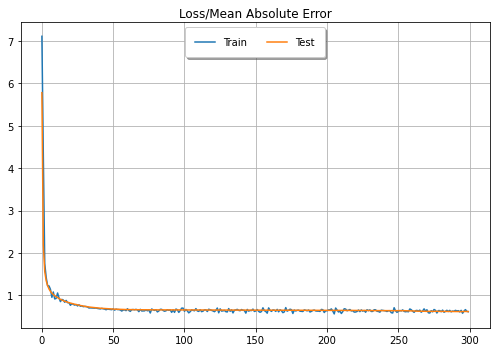

In [106]:
# plot loss during training
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(7,5), tight_layout=True)
plt.title('Loss/Mean Absolute Error')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()


In [99]:
# Model evaluate
model.evaluate(X_train,  y_train)

18/18 [==============================] - 0s 14ms/step - loss: 0.4809 - accuracy: 0.7535


[0.4808962047100067, 0.7534722089767456]

In [72]:
model.evaluate(X_test,  y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.3229


[0.6770833134651184, 0.3229166567325592]

In [ ]:
# create model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define Sequential model with 3 layers
model2 = Sequential()
model2.add(Dense(12, input_dim=m-1, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(
            optimizer='rmsprop',
            loss='binary_crossentropy', 
            metrics=['accuracy'],
            loss_weights=None,
            weighted_metrics=None,
            run_eagerly=None,
            steps_per_execution=5,
            jit_compile=None,
        )

# Fit the model
history2 = model2.fit(
                    x=X_train,
                    y=y_train,
                    batch_size=64,
                    epochs=300,
                    verbose='auto',
                    callbacks=None,
                    validation_split=0.0,
                    validation_data=(X_test, y_test),
                    shuffle=True,
                    class_weight=None,
                    sample_weight=None,
                    initial_epoch=0,
                    steps_per_epoch=1,
                    validation_steps=1,
                    validation_batch_size=None,
                    validation_freq=1,
                    max_queue_size=10,
                    workers=1,
                    use_multiprocessing=False
                )


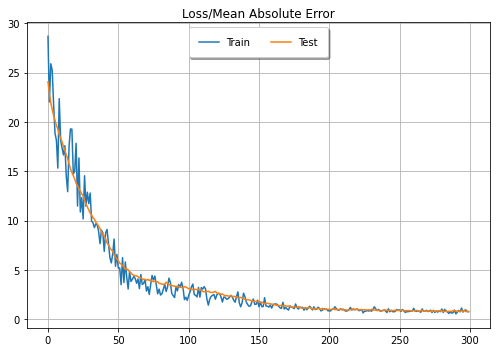

In [107]:
# plot loss during training
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(7,5), tight_layout=True)
plt.title('Loss/Mean Absolute Error')
plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Test')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='upper center', ncol=2)
plt.grid(True)
plt.show()

In [75]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Model evaluate
model2.evaluate(X_train,  y_train)

18/18 [==============================] - 0s 7ms/step - loss: 0.7828 - accuracy: 0.5391


[0.7828455567359924, 0.5390625]

In [77]:
# Model evaluate
model2.evaluate(X_test,  y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.8034 - accuracy: 0.5625


[0.8033648729324341, 0.5625]